In [1]:
from Prob_BlackScholesBarenblatt import BlackScholesBarenblatt

C:\Users\chaa\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
_ = '''
from FBSNNs import FBSNN 

import numpy as np # for np.exp, np.sum
import tensorflow as tf # for tf.sin, tf.reduce_sum, tf.linalg.diag

# r = 0.0
# sigma = 0.1
class BlackScholesBarenblatt(FBSNN):
    r = 0.0
    sigma = 0.1
    def __init__(self, Xi, T,
                       M, N, D,
                       layers):        
        # self.r = 0.05
        # self.sigma = 0.40
        super().__init__(Xi, T,
                         M, N, D,
                         layers)        
        self.r = 0.05
        self.sigma = 0.40
        
    def __str__(self):
        return super().__str__() + f'; r={self.r}, sigma={self.sigma}'
        
    # equation           
    def phi_tf(self, t, X, Y, Z): # M x 1, M x D, M x 1, M x D
        return self.r*(Y - tf.reduce_sum(X*Z, 1, keepdims = True)) # M x 1    
    # terminal condition
    def g_tf(self, X): # M x D
        return tf.reduce_sum(X**2, 1, keepdims = True) # M x 1
    
    # X process 
    def mu_tf(self, t, X, Y, Z): # M x 1, M x D, M x 1, M x D
        return super().mu_tf(t, X, Y, Z) # M x D        
    def sigma_tf(self, t, X, Y): # M x 1, M x D, M x 1
        return self.sigma*tf.linalg.diag(X) # M x D x D
        # return sigma*tf.linalg.diag(X) # M x D x D
    
    # exact_solution
    def u_exact(self, t, X): # (N+1) x 1, (N+1) x D
        return np.exp( (self.r + self.sigma**2)*(self.T - t) ) * np.sum(X**2, 1, keepdims = True) # (N+1) x 1
'''

In [3]:
print( BlackScholesBarenblatt.__doc__ )

None


In [4]:
from FBSNNs import FBSNN
print(FBSNN.__doc__)


    class FBSNNs - минимально исправленный оригинальный файл Raissi
    -- чтобы он запускался на tensorFlow2x
    -- добавлен аттрибут self.tool = 'tensorflow 1x'
    


In [5]:
import numpy as np # for: np.array

In [6]:
## model
M = 100 # number of trajectories (batch size)
N = 10 # 20 # 50 # number of time snapshots
D = 4 # 2 # 100 # number (even) of dimensions

layer_size = 32 # 256
    
layers = [D+1] + 4*[layer_size] + [1]
print( layers )

Xi = np.array([1.0,0.5]*int(D/2))[None,:]
print(Xi.shape, Xi)
T = 1.0
         
model = BlackScholesBarenblatt(Xi, T,   M, N, D,   layers) # , act_f = 'sin')
print( f'model = {model}') 
print( f'model.tool = {model.tool}' )
print( f"hasattr(self, 'act_func')={hasattr(model, 'act_func')}" )

[5, 32, 32, 32, 32, 1]
(1, 4) [[1.  0.5 1.  0.5]]
Device mapping: no known devices.
model = <Prob_BlackScholesBarenblatt.BlackScholesBarenblatt object at 0x000002868B709D00>; r=0.05, sigma=0.4
model.tool = tensorflow 1x
hasattr(self, 'act_func')=False


In [7]:
# print( f'model.tool.__class__.tool_ = {model.__class__.tool_}' )
print( f'Класс = model.__class__ = {model.__class__}' )
print( f'Предок = model.__class__.__bases__ = {model.__class__.__bases__}' )

Класс = model.__class__ = <class 'Prob_BlackScholesBarenblatt.BlackScholesBarenblatt'>
Предок = model.__class__.__bases__ = (<class 'FBSNNs.FBSNN'>,)


In [8]:
# for k,v in model.__dict__.items(): print( f'{k} = \t {v}' )

In [9]:
# Training
model.train(N_Iter = 1*10**2+1, learning_rate=1e-3)

It: 0, Loss: 2.042e+03, Y0: 0.020, Time: 2.07, Learning Rate: 1.000e-03
It: 10, Loss: 1.415e+03, Y0: 1.462, Time: 0.03, Learning Rate: 1.000e-03
It: 20, Loss: 9.179e+02, Y0: 2.856, Time: 0.04, Learning Rate: 1.000e-03
It: 30, Loss: 7.410e+02, Y0: 3.297, Time: 0.06, Learning Rate: 1.000e-03
It: 40, Loss: 7.211e+02, Y0: 3.325, Time: 0.05, Learning Rate: 1.000e-03
It: 50, Loss: 3.329e+02, Y0: 3.992, Time: 0.06, Learning Rate: 1.000e-03
It: 60, Loss: 4.873e+02, Y0: 4.213, Time: 0.04, Learning Rate: 1.000e-03
It: 70, Loss: 3.263e+02, Y0: 4.200, Time: 0.03, Learning Rate: 1.000e-03
It: 80, Loss: 2.858e+02, Y0: 4.044, Time: 0.03, Learning Rate: 1.000e-03
It: 90, Loss: 2.811e+02, Y0: 3.966, Time: 0.03, Learning Rate: 1.000e-03
It: 100, Loss: 2.842e+02, Y0: 3.873, Time: 0.04, Learning Rate: 1.000e-03


In [10]:
##### PLOT RESULTS
    
t_test, W_test = model.fetch_minibatch()

X_pred, Y_pred = model.predict(Xi, t_test, W_test)
# X_pred1, Y_pred1 = model.predict1(Xi, t_test, W_test)
# print( max( np.abs(X_pred-X_pred1) ), max( np.abs(Y_pred-Y_pred1) ) )

Y_test = np.reshape(model.u_exact(np.reshape(t_test[0:M,:,:],[-1,1]), np.reshape(X_pred[0:M,:,:],[-1,D])), [M,-1,1])

In [11]:
print(t_test.shape, Y_test.shape, Y_pred.shape, X_pred.shape)

(100, 11, 1) (100, 11, 1) (100, 11, 1) (100, 11, 4)


In [12]:
res = (t_test, X_pred, Y_pred, Y_test)

In [13]:
import matplotlib.pyplot as plt
# from plotting import newfig, savefig      ## рушить постройку графиков

In [15]:
from FBSNNs_plots import *

In [16]:
t_test[0,0,0]

0.0

In [18]:
'''
def plot_reluts(model, res, r=range(0,5), flag_err_info=0):
    t_test, X_pred, Y_pred, Y_test = res
    # в классе FBSNN нет аттрибутов name, s
    name_ = 'FBSNNs' if not hasattr(model, 'name') else model.name
    s_ = 0 if not hasattr(model, 's') else model.s # s=0
    ## s_ = t_test[0,0,0] if not hasattr(model, 's') else model.s # взять s из t_test 
    # в классе FBSNN_tf1 есть аттрибуты name, s   
    rmin = min(r)
    rmax = max(r)+1
    plt.figure() ## 
    # 0-я траектория 
    plt.plot(t_test[rmin,:,0].T,Y_pred[rmin,:,0].T,'b',label='Learned $u(t,X_t)$')
    plt.plot(t_test[rmin,:,0].T,Y_test[rmin,:,0].T,'r--',label='Exact $u(t,X_t)$')
    plt.plot(t_test[rmin,-1,0],Y_test[rmin,-1,0],'ks',label='$Y_T = u(T,X_T)$')
    # остальные траектории
    plt.plot(t_test[rmin+1:rmax,:,0].T, Y_pred[rmin+1:rmax,:,0].T, 'b')
    plt.plot(t_test[rmin+1:rmax,:,0].T, Y_test[rmin+1:rmax,:,0].T, 'r--')
    plt.plot(t_test[rmin+1:rmax,-1,0],  Y_test[rmin+1:rmax,-1,0],  'ks')

    # plt.plot([s_],Y_test[0,0,0],'ks',label = f'$Y_s = Y_\{{s_}\}=u(\{{s_}\},X_\{{s_}\}=\\xi)$')
    plt.plot([s_],Y_test[0,0,0],'ko',label = '$Y_s = Y_{'+f'{s_}'+'}=u({'+f'{s_}'+'},X_{'+f'{s_}'+'}=\\xi)$')
    
    plt.xlabel('$t$')
    plt.ylabel('$Y_t = u(t,X_t)$')
    
    rel_err_t0 = abs( (Y_pred[0,0,0]-Y_test[0,0,0])/Y_test[0,0,0] ) # ошибка в значении u(0, xi)
    if flag_err_info == 1:
        err_info = 'err_info' + ' $rel\_err_{t=' + f'{s_}'+'}$ = '+f'{rel_err_t0:.4f}' 
        ''' err_info = f' rel_err = {calc_error_point(Y_pred, Y_test, r)[3]} \n' +
              f' $||rel\_err||_1$ = {calc_rel_error_traj(Y_pred, Y_test, r, norm_ord=1)} \n' +
              f' $||rel\_err||_2$ = {calc_rel_error_traj(Y_pred, Y_test, r, norm_ord=2)} \n' +
              f' $||rel\_err||_\infty$ = {calc_rel_error_traj(Y_pred, Y_test, r, norm_ord=np.inf)} \n' +
              ' $rel\_err_{t=0}$ = '+f'{rel_err_t0:.4f}' 
        '''
    else: err_info = ''
    plt.title( f'{model.D}-dimensional {name_} (trajectories={r}) \n' + err_info )
    plt.legend()
    plt.grid()
'''

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 35)

False
False


AttributeError: 'BlackScholesBarenblatt' object has no attribute 'loss_history'

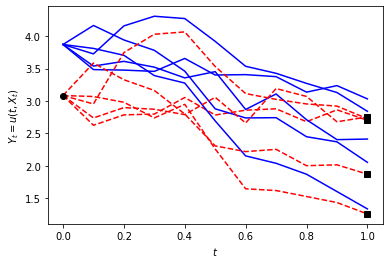

In [21]:
# в классе FBSNN нет аттрибутов name, s
if hasattr(model, 'name') : del model.name
if hasattr(model, 's') : del model.s
print( hasattr(model, 'name') )
print( hasattr(model, 's') )

plot_results(model, res)

True
True


AttributeError: 'BlackScholesBarenblatt' object has no attribute 'loss_history'

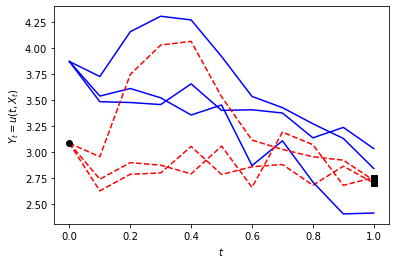

In [22]:
# if hasattr(model, 'name') : del model.name
# if hasattr(model, 's') : del model.s
# в классе FBSNN нет аттрибутов name, s, поэтому зададим их явно
if not hasattr(model, 'name') : model.name = 'BlackScholesBarenblatt'
if not hasattr(model, 's') : model.s = 0.0
print( hasattr(model, 'name') )
print( hasattr(model, 's') )

plot_results(model, res, r=range(0,3), flag_err_info=1)

In [ ]:
## TODO def plot_errors

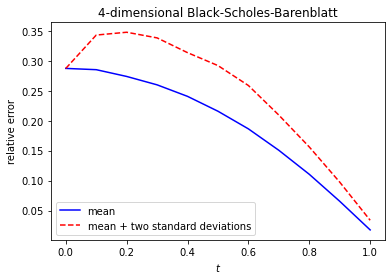

In [59]:
    errors = np.abs( (Y_test-Y_pred)/Y_test ) # np.sqrt( (Y_test-Y_pred)**2/Y_test**2 )
    mean_errors = np.mean(errors,0)
    std_errors = np.std(errors,0)
    
    plt.figure()
    plt.plot(t_test[0,:,0],mean_errors,'b',label='mean')
    plt.plot(t_test[0,:,0],mean_errors+2*std_errors,'r--',label='mean + two standard deviations')
    plt.xlabel('$t$')
    plt.ylabel('relative error')
    plt.title( f'{D}-dimensional Black-Scholes-Barenblatt')
    plt.legend()
    
    # savefig('./figures/BSB_Apr18_50_errors', crop = False)

In [24]:
plt.savefig('{}.pdf'.format('./figures/BSB_20240407_10_errors'))
# savefig('./figures/BSB_20230721_50_errors', crop = False)

<Figure size 432x288 with 0 Axes>